# Metropolis-Hastings-Algorithmus

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Teste den Metropolis-Hastings-Algorithmus für die Gauß-Funktion und verschiedene Anzahlen an Wiederholungen

In [154]:
def gaussian(x, mean=0, variance=1):
    """Gauß_Funktion: Simulation der Dichte der Standardnormalverteilung

    Args:
        x (_type_): Werte für die Verteilung
        mean (int, optional): Mittelwert. Defaults to 0.
        variance (int, optional): Varianz. Defaults to 1.

    Returns:
        _type_: Werte für die Größe in Abhängigkeit von x für die Standardnormalverteilung
    """
    return np.exp(-0.5 * ((x - mean) / np.sqrt(variance))**2) / np.sqrt(2 * np.pi * variance)

In [155]:
def metropolis_hastings(q, pi, k):
    """Algorithmus des Metropolis-Hastings-Algorithmus nach Skript
    Args:
        q (_type_): Vorschlagswahrscheinlichkeit
        pi (_type_): invariante Gleichgewichtsveretilung
        k (_type_): Anzahl der Iterationen

    Returns:
        _type_: Samples über die gegebene proposal distribution
    """
    # Initialisierung
    samples = []
    x = np.random.normal()  # Startpunkt aus einer normalverteilten Zufallszahl

    # Iterationen
    for _ in range(k):
        # Übergangswahrscheinlichkeit
        x_star = np.random.normal()

        # Akzeptanzwahrscheinlichkeit
        rho = min(1, pi(x_star) * q(x_star) / (pi(x) * q(x)))

        # Test und Aktualisierung
        u = np.random.uniform(0, 1)
        if u <= rho:
            x = x_star  # Akzeptiere den Kandidaten
        samples.append(x)

    return samples

In [156]:
# Zielverteilung (Normalverteilung)
def pi(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Vorschlagswahrscheinlichkeit (Übergangsmatrix Q)
def q(x):
    return np.random.normal(size=1)

variance = 1
iterations_values = [100, 1000, 5000, 10000]

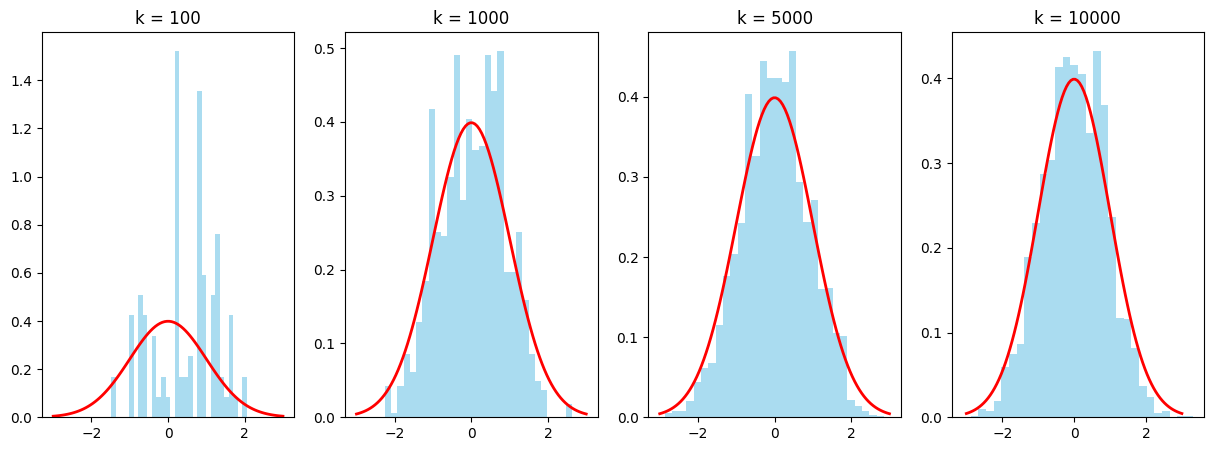

In [157]:
# Samplen für verschiedene Iterationsanzahlen k
plt.figure(figsize=(15, 5))

for i, iterations in enumerate(iterations_values):
    samples = metropolis_hastings(np.random.normal, pi, iterations)
    
    plt.subplot(1, len(iterations_values), i + 1)
    plt.title(f'k = {iterations}')
    plt.hist(samples, bins=30, density=True, color='skyblue', alpha=0.7)

    x_range = np.linspace(-3, 3, 100)
    plt.plot(x_range, pi(x_range), 'r-', lw=2)

plt.show()

In [158]:
# Plotly-Darstellung
fig = make_subplots(
    rows=1, cols=len(iterations_values), subplot_titles=[f'k = {iterations}' for iterations in iterations_values]
)

for i, iterations in enumerate(iterations_values):
    samples = metropolis_hastings(np.random.normal, pi, iterations)
    x_range = np.linspace(-3, 3, 100)

    fig.add_trace(
        go.Histogram(x=samples, nbinsx=30, histnorm='probability density'),

        row=1, col=i + 1
    )

    fig.add_trace(
        go.Scatter(x=x_range, y=pi(x_range), mode='lines', line=dict(color='red', width=2)),
        row=1, col=i + 1
    )


fig.update_layout(height=400, width=1000, showlegend=False)
fig.show()

In [159]:
def calculate_running_mean(samples):
    """laufenden Mittelwert für eine Liste von Samples

    Args:
        samples: k siehe Wertte von obn

    Returns:
        mittelwert
    """
    return np.cumsum(samples) / np.arange(1, len(samples) + 1)

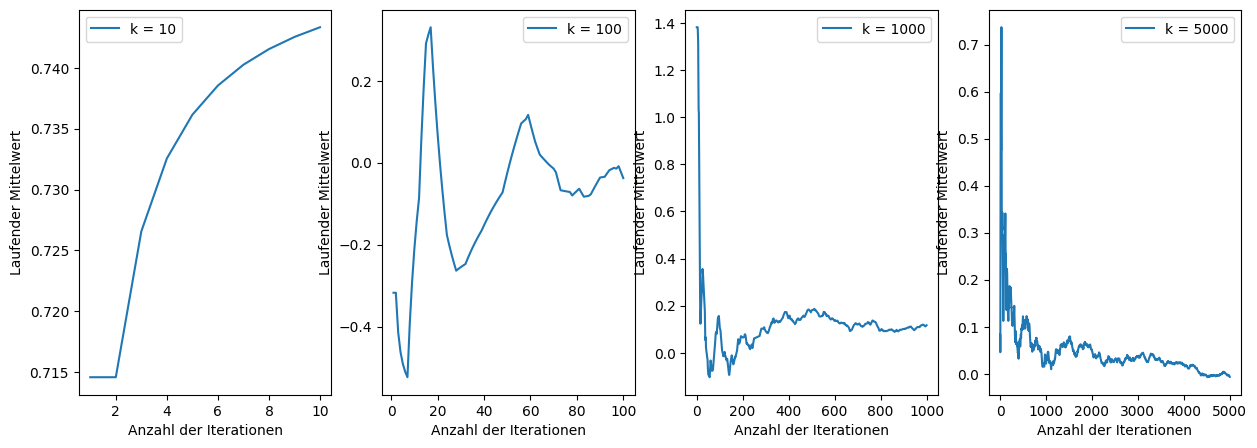

In [160]:
# Definiere die Anzahl der Iterationen
iterations_values = [10, 100, 1000, 5000]

# Plot für jeden Mittelwert von k
plt.figure(figsize=(15, 5))
for i, iterations in enumerate(iterations_values):
    samples = metropolis_hastings(np.random.normal, pi, iterations)
    
    # Berechne den laufenden Mittelwert
    running_mean = calculate_running_mean(samples)
    
    # Plotte den laufenden Mittelwert
    plt.subplot(1, len(iterations_values), i + 1)
    plt.plot(np.arange(1, iterations + 1), running_mean, label=f'k = {iterations}')
    plt.xlabel('Anzahl der Iterationen')
    plt.ylabel('Laufender Mittelwert')
    plt.legend()

plt.show()

In [161]:
# Plotly-Darstellung
# Definiere die Anzahl der Iterationen
iterations_values = [10, 100, 1000, 5000]
fig = make_subplots(rows=1, cols=1, subplot_titles=["Mittelwertberechnung"])

for iterations in iterations_values:
    samples = metropolis_hastings(q, pi, iterations)
    mean_values = np.cumsum(samples) / (np.arange(1, iterations + 1))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, iterations + 1), y=mean_values, mode='lines', line=dict(width=2), name=f'k = {iterations}'),
        row=1, col=1
    )

fig.update_xaxes(title_text="Iterationen", row=1, col=1)
fig.update_yaxes(title_text="Mittelwert", row=1, col=1)

fig.update_layout(height=400, width=800, showlegend=True, legend=dict(x=0, y=1))
fig.show()